In [1]:
#libraries for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
# Importing datas
df = pd.read_csv('/content/HR_comma_sep.csv')

In [5]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [16]:
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


<ipython-input-6-254988181d55>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

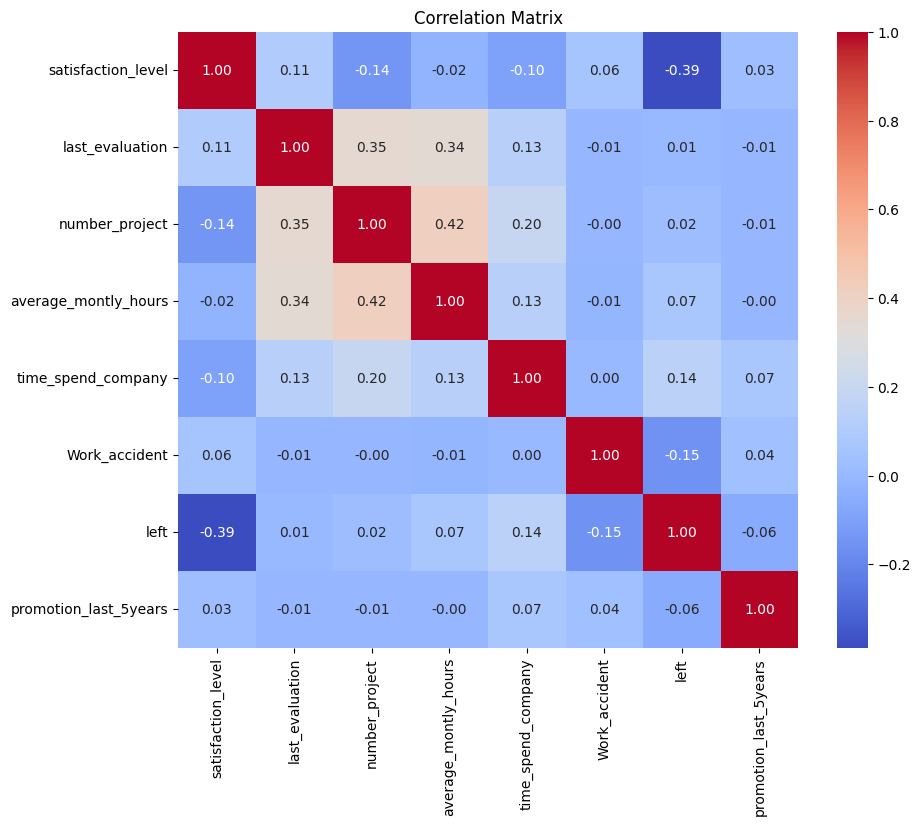

In [6]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print(corr_matrix)

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()

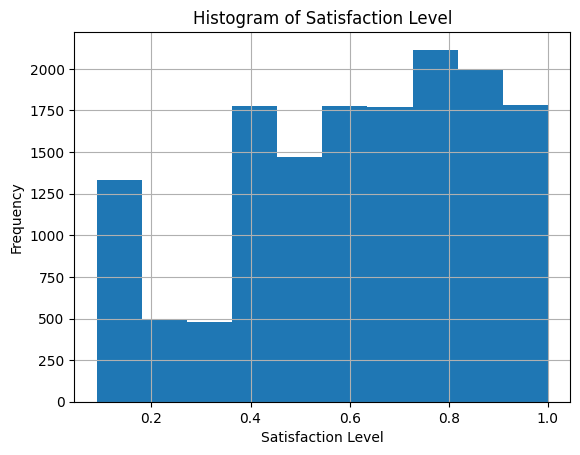

In [7]:
df['satisfaction_level'].hist()
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.title('Histogram of Satisfaction Level')
plt.show()

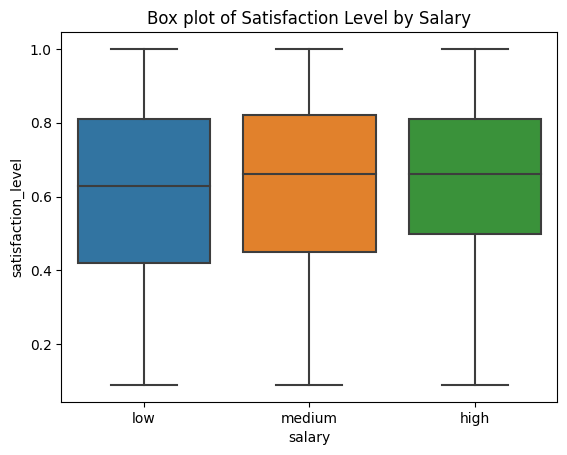

In [8]:
sns.boxplot(x='salary', y='satisfaction_level', data=df)
plt.title('Box plot of Satisfaction Level by Salary')
plt.show()

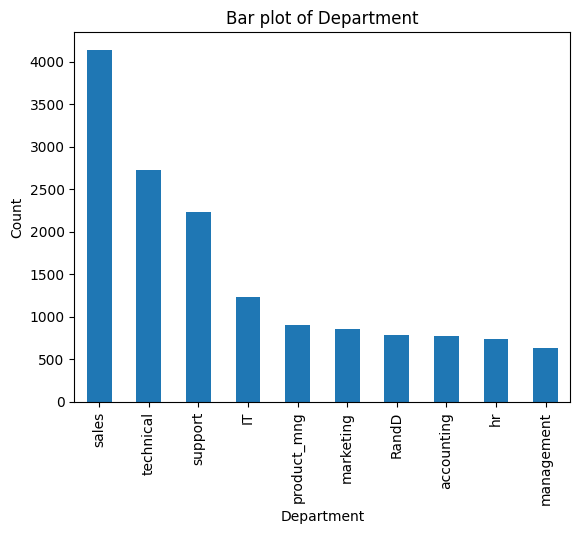

In [9]:
df['Department'].value_counts().plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Bar plot of Department')
plt.show()

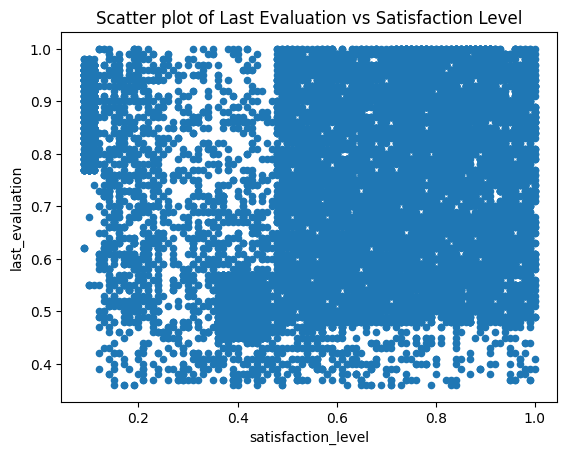

In [10]:
df.plot(kind='scatter', x='satisfaction_level', y='last_evaluation')
plt.title('Scatter plot of Last Evaluation vs Satisfaction Level')
plt.show()

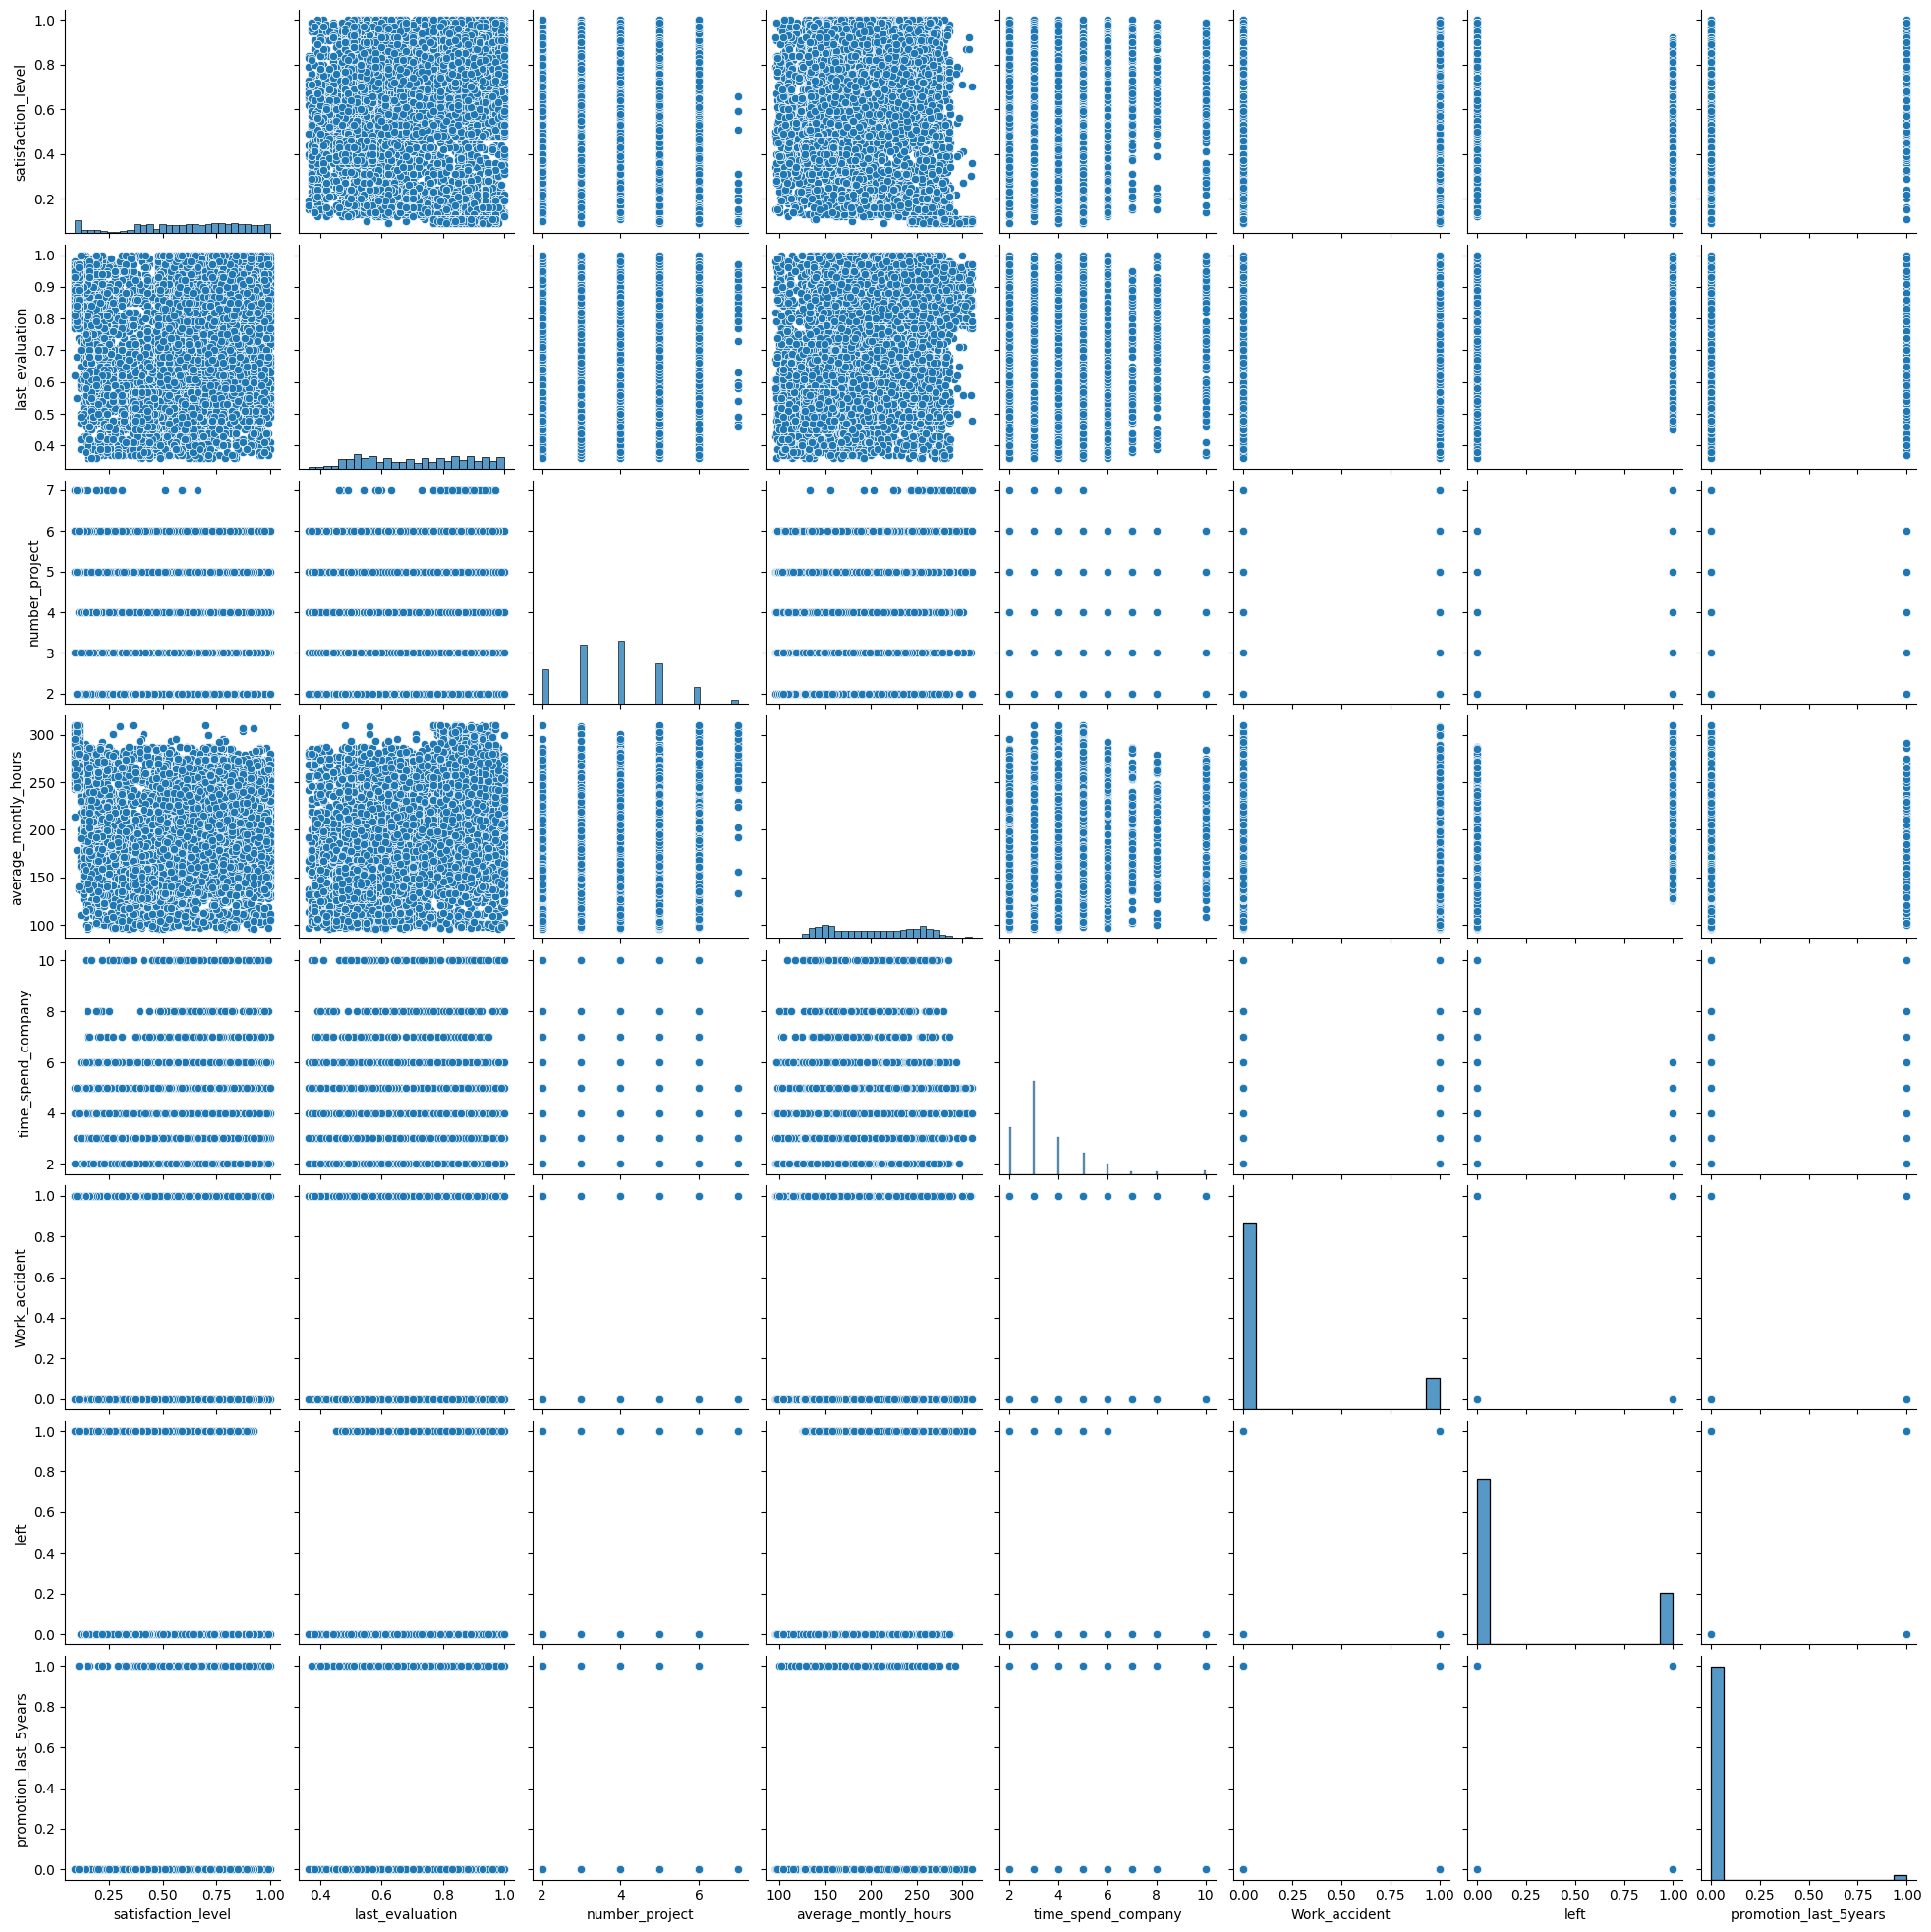

In [11]:
sns.pairplot(df)
plt.show()

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None


In [13]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


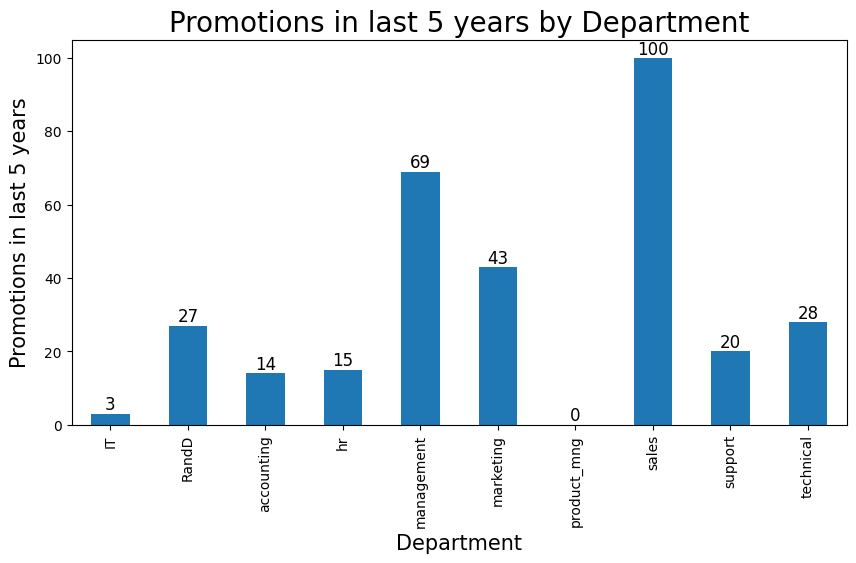

In [17]:
#plot bar chart to see promotions in last 5 years
plt.figure(figsize=(10,5))
ax = df.groupby('Department')['promotion_last_5years'].sum().plot(kind='bar')
plt.ylabel('Promotions in last 5 years', fontsize=15)
plt.xlabel('Department', fontsize=15)
plt.title('Promotions in last 5 years by Department', fontsize=20)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.show()

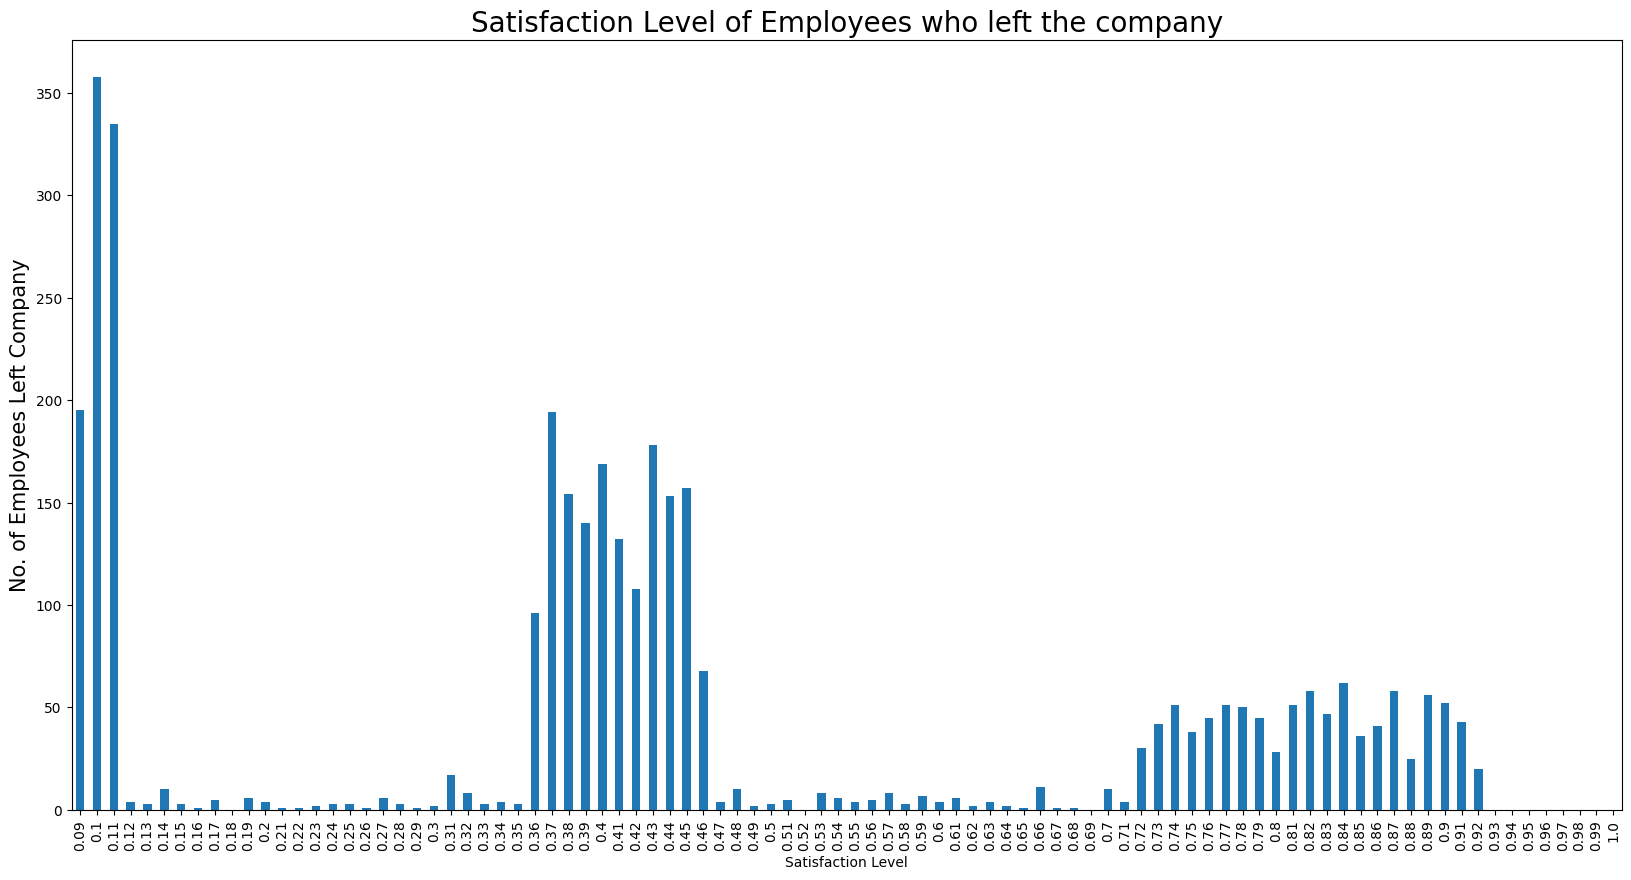

In [18]:
#plot bar chart to see satisfaction level of employees who left the company
plt.figure(figsize=(20,10))
df.groupby('satisfaction_level')['left'].sum().plot(kind='bar')
plt.ylabel('No. of Employees Left Company',fontsize=15)
plt.xlabel('Satisfaction Level')
plt.title('Satisfaction Level of Employees who left the company', fontsize=20)
plt.show()

In [19]:
# Binarize salary
salary_mapping = {'low': 0, 'medium': 1, 'high': 2}
df['salary'] = df['salary'].map(salary_mapping)

# One-hot encode department
df = pd.get_dummies(df, columns=['Department'], drop_first=True)

# Create interaction term
df['hours_project_interaction'] = df['average_montly_hours'] * df['number_project']

In [20]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,hours_project_interaction
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,314
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,1,0,0,1310
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,1,0,0,1904
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,1115
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,0,0,0,0,0,0,0,1,0,302
14995,0.37,0.48,2,160,3,0,1,0,0,0,0,0,0,0,0,0,1,0,320
14996,0.37,0.53,2,143,3,0,1,0,0,0,0,0,0,0,0,0,1,0,286
14997,0.11,0.96,6,280,4,0,1,0,0,0,0,0,0,0,0,0,1,0,1680


In [21]:
features = df.drop('left', axis=1)
target = df['left']

In [22]:
# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model
log_reg.fit(X_train, y_train)

# Predict the target for the test set
y_pred = log_reg.predict(X_test)

# Compute accuracy and display confusion matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.881
Confusion Matrix:
[[2168  126]
 [ 231  475]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Using MinMaxScaler and StandardScaler



In [24]:
from sklearn.preprocessing import MinMaxScaler

# create scaler
scaler = MinMaxScaler()

# fit and transform in one step
features_norm = scaler.fit_transform(features)


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create and train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Model accuracy: 0.879
